In [40]:
import numpy as np
import pylab as plt
import math as m
import tifffile

Goals for accuracy

-Greater than 80% positive

-Manual verification

-IMARIS is SOTA

-106.7/5 = 21.34 is nm/pixel

Number of frames: 4
Shape of each frame: (2560, 2560)
Data type of each pixel: float32


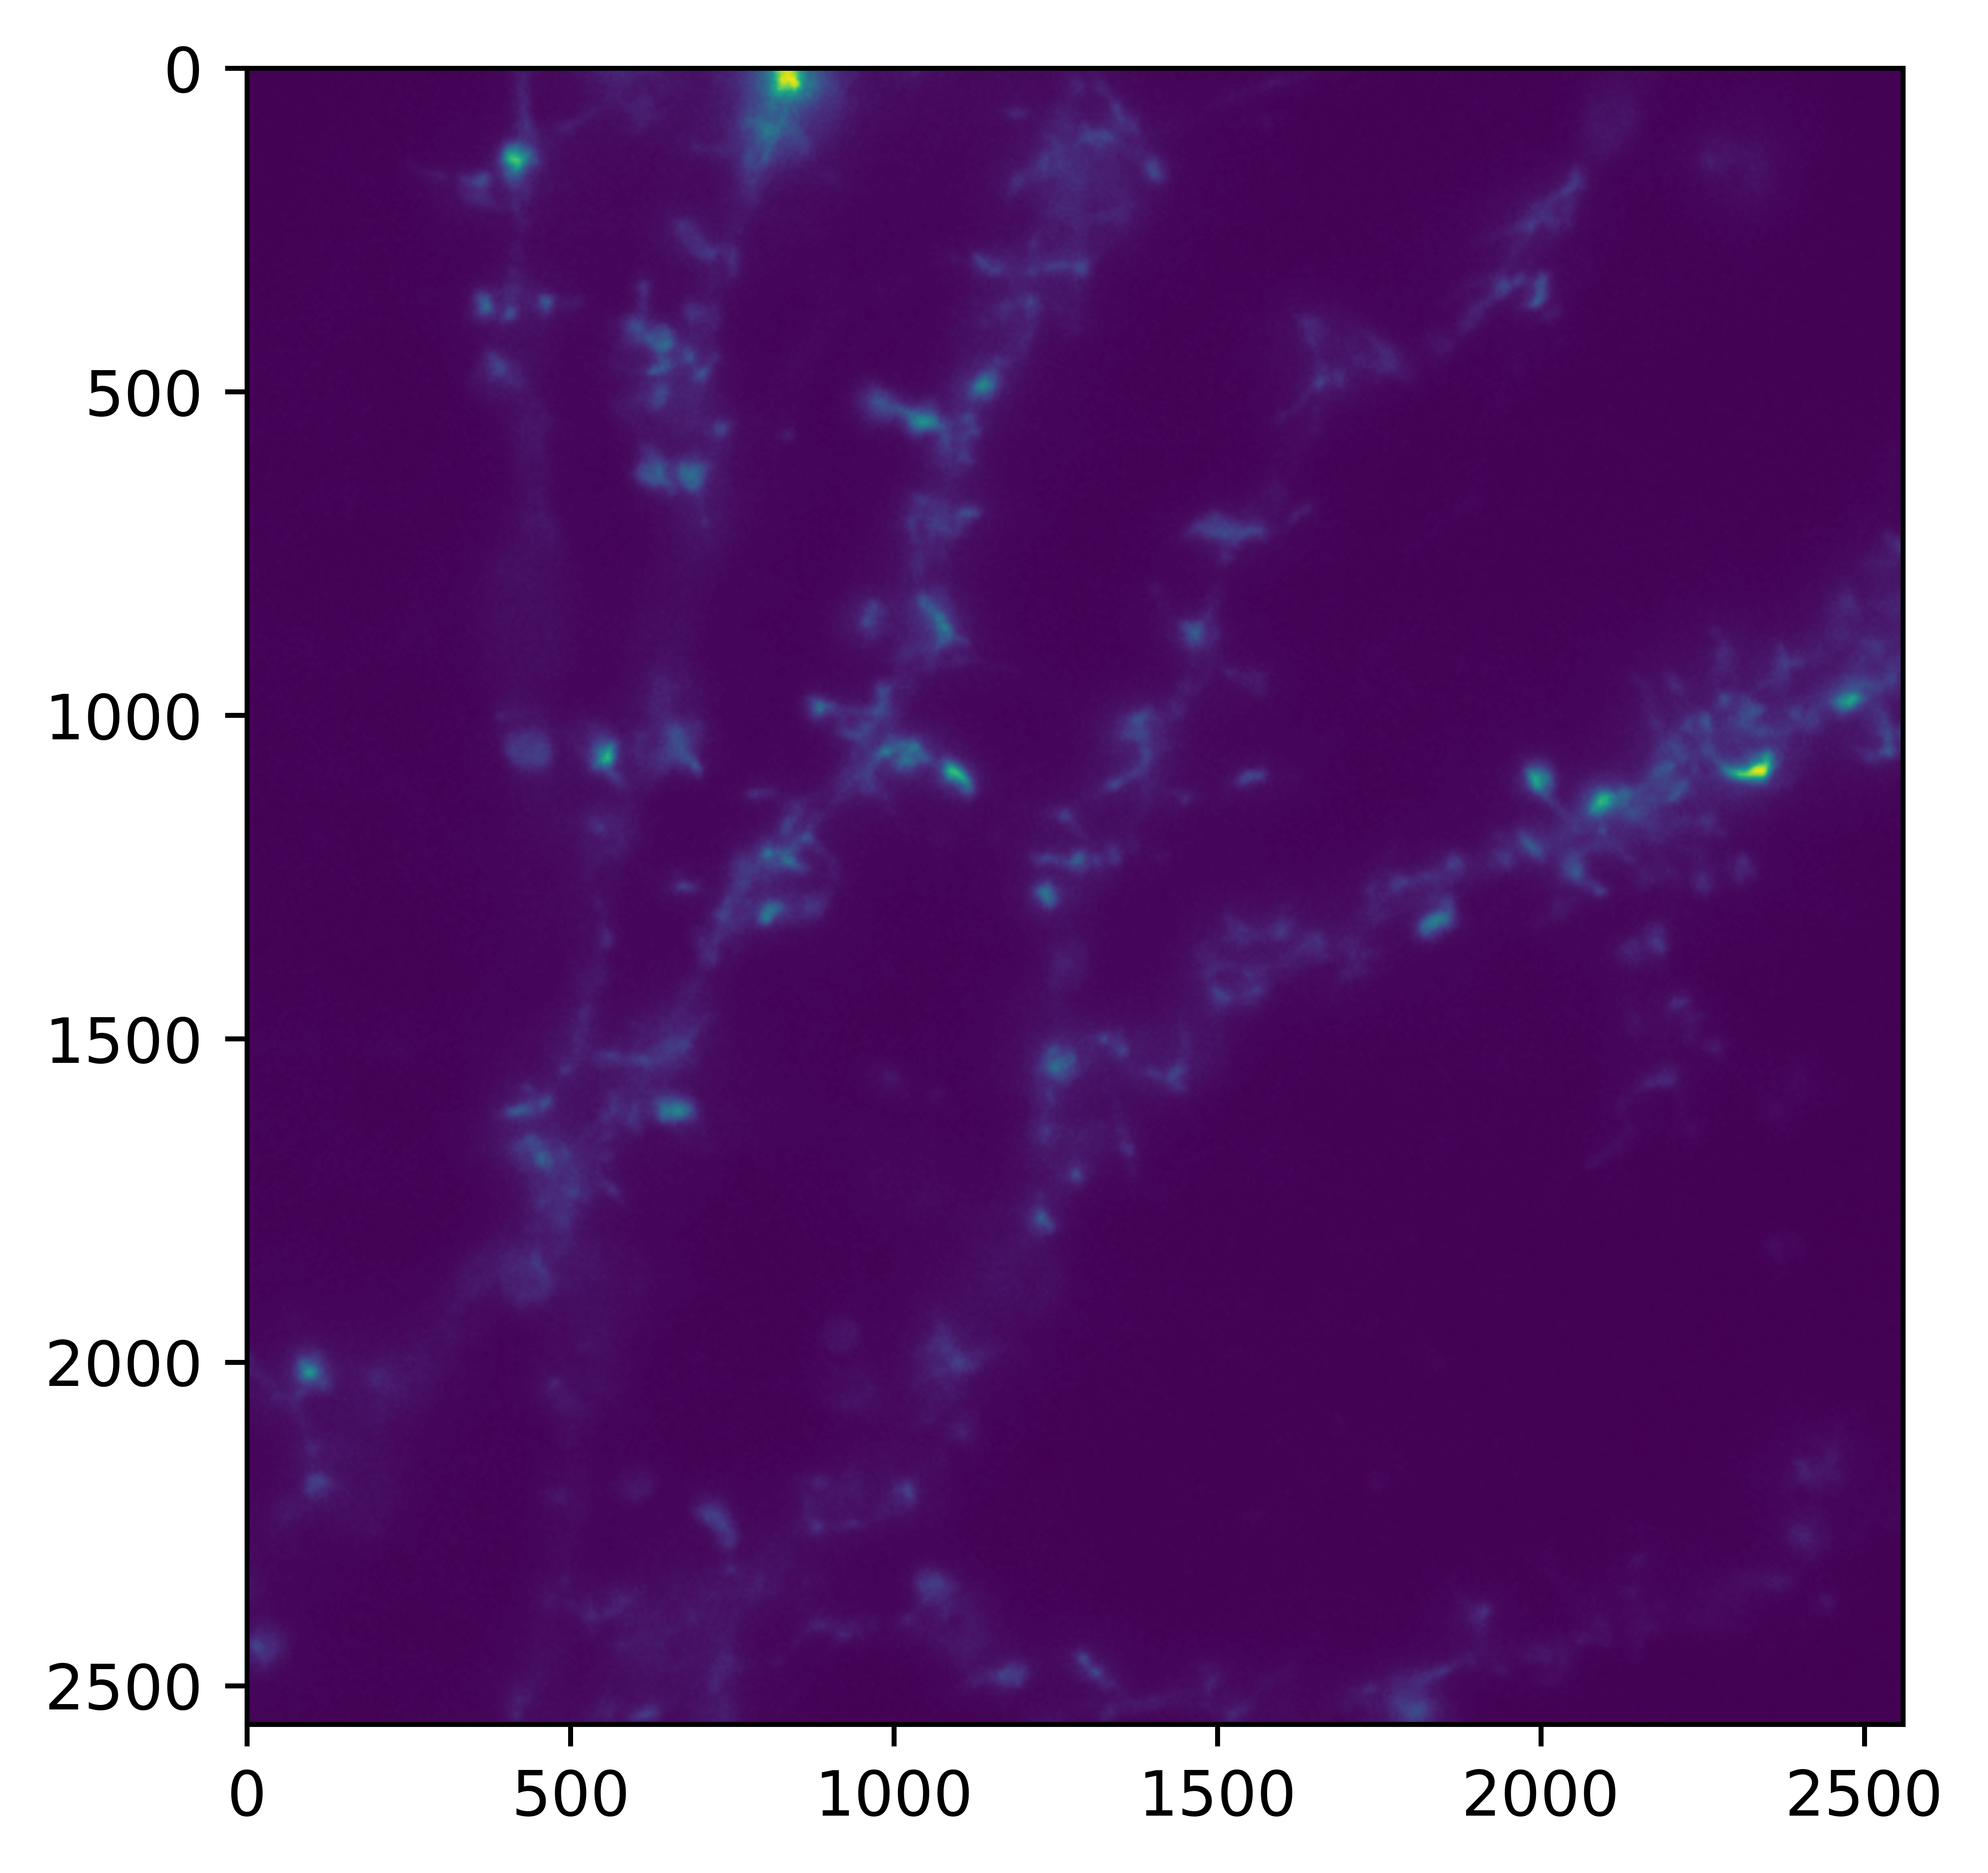

In [41]:
# Open the TIFF movie
with tifffile.TiffFile('Examples/B1_Composite.tif') as tif:
    # Get the number of frames in the movie
    n_frames = len(tif.pages)

    # Read all frames of the movie and store them as a numpy array
    movie = np.zeros((n_frames, tif.pages[0].shape[0], tif.pages[0].shape[1]), dtype='uint16')
    for i in range(n_frames):
        movie[i,:,:] = tif.pages[i].asarray()

    # Print relevant information about the movie
    print('Number of frames: {}'.format(n_frames))
    print('Shape of each frame: {}'.format(tif.pages[0].shape))
    print('Data type of each pixel: {}'.format(tif.pages[0].dtype))

# Display the first frame of the movie
plt.figure(dpi=1000)
plt.imshow(movie[0,:,:])
plt.show()

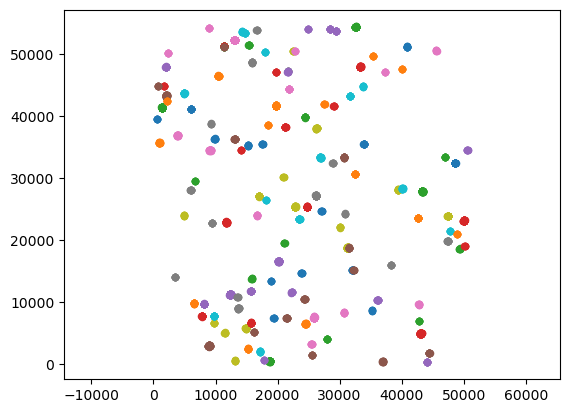

In [29]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk

# Step 1: Load post-synaptic marker (e.g., Homer, PSD95) ThunderSTORM data
path = r'C:\Users\icedn\Jupyter\SelvinLab\Selvin-Lab-qPAINT-Segmentation\Examples'
outputindex = os.path.basename(os.path.dirname(path))
dim = 2
picasso = 0  # if Picasso = 1, otherwise = 0
synapse_size = 50  # cluster size in nm
min_neighbours = 5  # minimum number of neighbours w/n synapse_size radius for cluster filtering

root = Tk()
root.withdraw()
# file_path = filedialog.askopenfilename(initialdir=path, title="Select the Homer (or synaptic marker) file to process",
#                                        filetypes=(("CSV files", "*.csv"), ("All files", "*.*")))
file_path = r"C:\Users\icedn\Jupyter\SelvinLab\Selvin-Lab-qPAINT-Segmentation\Examples\B1_aHomer_corrected.csv"

try:
    ThunderSTORM1 = pd.read_csv(file_path, sep=',', skiprows=1, header=None)
except Exception:
    ThunderSTORM1 = pd.read_excel(file_path, header=None)

if picasso == 1:
    ThunderSTORM1.iloc[:, 1] = ThunderSTORM1.iloc[:, 1] + 1

ThunderSTORM = [ThunderSTORM1.values]
if dim == 3:
    palmX = ThunderSTORM[0][:, 2]
    palmY = ThunderSTORM[0][:, 3]
    palmZ = ThunderSTORM[0][:, 4]
    data_Syn = np.column_stack((palmX, palmY, palmZ))
elif dim == 2:
    palmX = ThunderSTORM[0][:, 2]
    palmY = ThunderSTORM[0][:, 3]
    data_Syn = np.column_stack((palmX, palmY))

# Finding clusters
db = DBSCAN(eps=synapse_size, min_samples=min_neighbours, metric='euclidean').fit(data_Syn)
Class = db.labels_
type_ = np.array([1 if label != -1 else 0 for label in Class])



# Make new matrix
cluster_avgs = []
if dim == 3:
    Syn = np.column_stack((palmX, palmY, 0.79 * palmZ, Class, type_))
    # Separate and plot clusters
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for k in np.unique(Class):
        if k != -1:
            cluster_points = Syn[Syn[:, 3] == k]
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], s=20)
elif dim == 2:
    Syn = np.column_stack((palmX, palmY, Class, type_))
    # Separate and plot clusters
    plt.figure()

    for k in np.unique(Class):
        if k != -1:
            cluster_points = Syn[Syn[:, 2] == k]
            cluster_avgs.append((sum(cluster_points[:, 0])/len(cluster_points[:, 0]), sum(cluster_points[:, 1])/len(cluster_points[:, 1])))
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=20)
plt.axis('equal')
# plt.xlim(500, 570)
# plt.ylim(39530, 39600)
plt.show()

2371.544716691471 2550.2734613897615 24.8349862204683 15.472835990614302


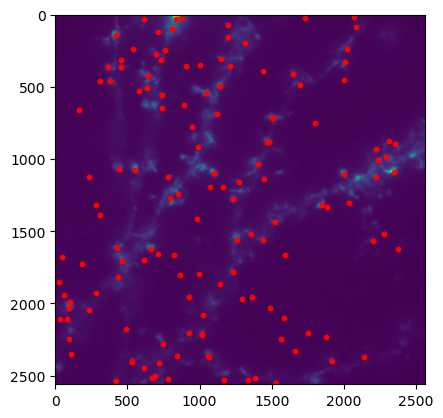

In [46]:
# print(cluster_avgs)
xs = [pt[0]/21.34 for pt in cluster_avgs]
ys = [pt[1]/21.34 for pt in cluster_avgs]
print(max(xs), max(ys), min(xs), min(ys))
plt.figure()
plt.imshow(movie[0,:,:])
plt.scatter(xs, ys, s=10, color='r')
plt.show()

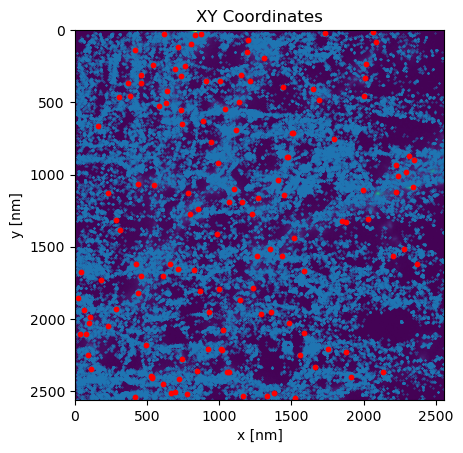

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# read the csv file into a pandas dataframe
df = pd.read_csv(r'Examples\B1_GluA1_corrected.csv', delimiter=',')

# extract the x and y columns
x = df['x [nm]']/21.34
y = df['y [nm]']/21.34

# create a scatter plot
plt.figure()
plt.scatter(x, y, s=0.1)
plt.xlabel('x [nm]')
plt.ylabel('y [nm]')
plt.title('XY Coordinates')
plt.imshow(movie[0,:,:])
plt.scatter(xs, ys, s=10, color='r')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the csv file into a pandas dataframe
df = pd.read_csv('your_csv_file.csv', delimiter='\t')

# extract the x and y columns
x_all = df['x [nm]']
y_all = df['y [nm]']

# define the xs and ys that you want to use as reference points
xs_ref = [1000, 5000, 10000]
ys_ref = [5000, 10000, 20000]

# create a meshgrid of x and y values
x_range = np.arange(np.min(x_all), np.max(x_all) + 1, 1)
y_range = np.arange(np.min(y_all), np.max(y_all) + 1, 1)
xx, yy = np.meshgrid(x_range, y_range)

# calculate the distances between each point in the meshgrid and each reference point
distances = np.sqrt((np.subtract.outer(xs_ref, xx)**2 + np.subtract.outer(ys_ref, yy)**2))

# create a boolean mask for points within 500 nm of any reference point
mask = np.any(distances <= 500, axis=0)

# extract the x and y values that satisfy the mask
x_within_500 = xx[mask].tolist()
y_within_500 = yy[mask].tolist()

# create a scatter plot of the points within 500 nm of a reference point
plt.scatter(x_within_500, y_within_500)
plt.xlabel('x [nm]')
plt.ylabel('y [nm]')
plt.title('XY Coordinates within 500nm of Reference Points')
plt.show()